In [1]:
# # adjsut the basic logging lovel of notebook
# import logging
# logging.basicConfig(level=logging.WARNING)

import os
import yaml
import numpy as np
import pandas as pd
import scipy as scp
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns
from matplotlib.lines import Line2D
from palettable.colorbrewer import qualitative

from auditory_cortex.analyses import Correlations
from auditory_cortex import results_dir, aux_dir, saved_corr_dir, cache_dir
from auditory_cortex.utils import CorrelationUtils
from auditory_cortex.plotters.correlation_plotter import RegPlotter

from pycolormap_2d import ColorMap2DBremm, ColorMap2DZiegler
%matplotlib inline

In [3]:
results_dir

'/depot/jgmakin/data/auditory_cortex/results/'

In [ ]:
cache_dir

In [ ]:
# self.data.to_csv(self.corr_file_path, index=False)

In [4]:
model_name = 'whisper_tiny'
# model_name = 'whisper_base'
# model_name = 'deepspeech2'
# model_name = 'w2v2_audioset'

# id = '_trf_300_l2'
id = '_trf_300'
# id = '_trf_300_l19'
# id = '_reset_weights0'
corr_obj = Correlations(
    model_name=model_name+id,
    )
print(f"'{model_name}'")
print(corr_obj.data['session'].unique().size)
print(corr_obj.data['opt_lmbda'].unique())

Using default normalizer file...
'whisper_tiny'
41
[5. 4. 3. 6. 9. 7. 8.]


In [8]:
corr_obj.data[
	(corr_obj.data['session']==180728) &\
	(corr_obj.data['layer']==3)
]

,session,layer,channel,bin_width,delay,test_cc_raw,normalizer,opt_lag,opt_lmbda,N_sents,poiss_entropy,uncertainty_per_spike,bits_per_spike_NLB,layer_type,normalized_test_cc
5330,180728.0,3.0,0.0,50.0,0.0,0.032489,0.058575,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.134238
5331,180728.0,3.0,1.0,50.0,0.0,0.006572,-0.018787,300.0,5.0,500.0,0.0,0.0,0.0,transformer,NaN
5332,180728.0,3.0,2.0,50.0,0.0,0.007201,-0.007580,300.0,5.0,500.0,0.0,0.0,0.0,transformer,NaN
5333,180728.0,3.0,3.0,50.0,0.0,0.015761,-0.003260,300.0,5.0,500.0,0.0,0.0,0.0,transformer,NaN
5334,180728.0,3.0,4.0,50.0,0.0,0.100413,0.141999,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.266469
5335,180728.0,3.0,5.0,50.0,0.0,0.128379,0.100337,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.405288
5336,180728.0,3.0,6.0,50.0,0.0,0.052928,-0.002032,300.0,5.0,500.0,0.0,0.0,0.0,transformer,NaN
5337,180728.0,3.0,7.0,50.0,0.0,0.006711,-0.016327,300.0,5.0,500.0,0.0,0.0,0.0,transformer,NaN
5338,180728.0,3.0,8.0,50.0,0.0,-0.006528,-0.007103,300.0,5.0,500.0,0.0,0.0,0.0,transformer,NaN
5339,180728.0,3.0,9.0,50.0,0.0,0.021071,0.013788,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.179445


In [2]:
# model_name = 'whisper_tiny'
# model_name = 'whisper_base'
model_name = 'deepspeech2'
# model_name = 'w2v2_audioset'

id = '_trf_300_l3'
# id = '_trf_300_l19'
# id = '_reset_weights0'
corr_obj = Correlations(
    model_name=model_name+id,
    )
print(f"'{model_name}'")
print(corr_obj.data['session'].unique().size)
print(corr_obj.data['opt_lmbda'].unique())

Using default normalizer file...
'deepspeech2'
4
[5. 7.]


In [8]:
corr_obj.data['session'].unique()

array([180413., 180420., 180501., 180502., 180613., 180622., 180627.,
       180717., 180719., 180720., 180724., 180728.])

In [3]:
# model_name = 'whisper_tiny'
# model_name = 'whisper_base'
model_name = 'deepspeech2'
# model_name = 'w2v2_audioset'

id = '_trf_300_l3'
# id = '_trf_300_l19'
# id = '_reset_weights0'
corr_obj = Correlations(
    model_name=model_name+id,
    )
print(f"'{model_name}'")
print(corr_obj.data['session'].unique().size)
print(corr_obj.data['opt_lmbda'].unique())

Using default normalizer file...
'deepspeech2'
2
[5.]


In [8]:
# model_name = 'whisper_tiny'
# model_name = 'whisper_base'
model_name = 'deepspeech2'
# model_name = 'w2v2_audioset'

id = '_trf_300_l2'
# id = '_trf_300_l19'
# id = '_reset_weights0'
corr_obj = Correlations(
    model_name=model_name+id,
    )
print(f"'{model_name}'")
print(corr_obj.data['session'].unique().size)
print(corr_obj.data['opt_lmbda'].unique())

Using default normalizer file...
'deepspeech2'
3
[5.]


(array([48.,  0., 32.,  0.,  0.,  0.,  0.,  0.,  0., 32.]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 10 artists>)

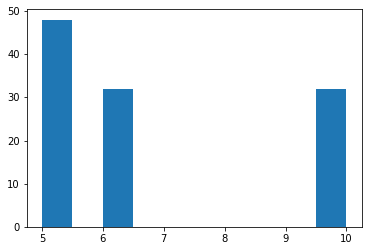

In [13]:
plt.hist(corr_obj.data['opt_lmbda'])

In [15]:
sess = 180728
ch=5
corr_obj.data[(corr_obj.data['session']==sess)&\
	(corr_obj.data['channel']==ch)]

,session,layer,channel,bin_width,delay,test_cc_raw,normalizer,opt_lag,opt_lmbda,N_sents,poiss_entropy,uncertainty_per_spike,bits_per_spike_NLB
181,180728.0,3.0,5.0,50.0,0.0,0.128379,0.0,300.0,5.0,500.0,0.0,0.0,0.0


In [17]:
model_name = 'whisper_tiny'

id = '_test_all_trials'
# id = '_reset_weights0'
corr_obj = Correlations(
    model_name=model_name+id,
    )
print(f"'{model_name}'")
print(corr_obj.data['session'].unique().size)

Using default normalizer file...
'whisper_tiny'
41


In [18]:
sess = 180728
ch=5
corr_obj.data[(corr_obj.data['session']==sess)&\
	(corr_obj.data['channel']==ch)]

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,poiss_entropy,uncertainty_per_spike,bits_per_spike_NLB,normalizer,N_sents,opt_delays,layer_type,normalized_test_cc
1061,180728.0,0.0,5.0,50.0,0.0,0.0,0.056051,1.764718e+00,1.229927e-02,-4.551600e-03,0.100337,500.0,80.0,conv,0.176951
1077,180728.0,1.0,5.0,50.0,0.0,0.0,0.078267,1.770179e+00,1.245770e-02,-4.607283e-03,0.100337,500.0,100.0,conv,0.247086
1093,180728.0,2.0,5.0,50.0,0.0,0.0,0.098009,1.788465e+00,1.258639e-02,-4.735976e-03,0.100337,500.0,100.0,transformer,0.309411
1109,180728.0,3.0,5.0,50.0,0.0,0.0,0.106846,1.759185e+00,1.238033e-02,-4.529915e-03,0.100337,500.0,100.0,transformer,0.337310
1125,180728.0,4.0,5.0,50.0,0.0,0.0,0.081583,1.817622e+00,1.266799e-02,-4.949849e-03,0.100337,500.0,90.0,transformer,0.257556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135081,180728.0,1.0,5.0,800.0,0.0,0.0,-0.277417,1.619510e+05,1.578689e+03,-1.578652e+03,0.287904,500.0,100.0,conv,-0.517023
135097,180728.0,2.0,5.0,800.0,0.0,0.0,-0.329363,9.862591e+05,9.613994e+03,-9.613957e+03,0.287904,500.0,100.0,transformer,-0.613834
135113,180728.0,3.0,5.0,800.0,0.0,0.0,-0.233008,1.503735e+06,1.455994e+04,-1.455990e+04,0.287904,500.0,80.0,transformer,-0.434257
135129,180728.0,4.0,5.0,800.0,0.0,0.0,-0.215377,5.085529e+08,4.924073e+06,-4.924073e+06,0.287904,500.0,80.0,transformer,-0.401399


### combine correlations for TRF models..

In [10]:
def display_sessions_done(model_name, identifier, verbose=False):
	"""Display the number of sessions done for all bin widths
	"""
	if verbose:
		print(f"For '{model_name}', '{identifier}'")
	corr_obj = Correlations(model_name+'_'+identifier)
	bin_widths = np.sort(corr_obj.data['bin_width'].unique())
	return_list = []
	for bin_width in bin_widths:
		data = corr_obj.get_selected_data(bin_width=bin_width)
		if verbose:
			print(f"For bin_width: {bin_width:03} ms, sessions done: {len(data['session'].unique())}")
		if len(data['session'].unique()) != 41:
			return_list.append(model_name+'_'+identifier+f'{bin_width}')
		else:
			return_list.append(None)
	return return_list

def check_saved_results(model_names, identifier, verbose=False):

	models_not_done = []
	if 'whisper_tiny' in model_names:
		for i in range(6):
			not_done = display_sessions_done('whisper_tiny', identifier+f'_l{i}', verbose=verbose)
			models_not_done.extend(not_done)
	if 'whisper_base' in model_names:
		for i in range(8):
			not_done = display_sessions_done('whisper_base', identifier+f'_l{i}', verbose=verbose)
			models_not_done.extend(not_done)
	if 'wav2letter_modified' in model_names:
		for i in range(14):
			not_done = display_sessions_done('wav2letter_modified', identifier+f'_l{i}', verbose=verbose)
			models_not_done.extend(not_done)
	if 'wav2vec2' in model_names:
		for i in range(21):
			not_done = display_sessions_done('wav2vec2', identifier+f'_l{i}', verbose=verbose)
			models_not_done.extend(not_done)

	if 'w2v2_audioset' in model_names:
		for i in range(21):
			not_done = display_sessions_done('wav2vec2', identifier+f'_l{i}', verbose=verbose)
			models_not_done.extend(not_done)

	if 'speech2text' in model_names:
		for i in range(14):
			not_done = display_sessions_done('speech2text', identifier+f'_l{i}', verbose=verbose)
			models_not_done.extend(not_done)

	if 'deepspeech2' in model_names:
		for i in range(7):
			not_done = display_sessions_done('deepspeech2', identifier+f'_l{i}', verbose=verbose)
			models_not_done.extend(not_done)


	# remove None entries..
	while None in models_not_done:
		models_not_done.remove(None)
	
	if len(models_not_done) ==0:
		print(f"All models done..for {identifier}")
	else:
		print(f"Models with incomplete resutls:")
		for iden in models_not_done:
			print(iden)
	

def combine_results_for_all_models(identifier, model_names=None, ):
	"""Combines results for the list of models provided"""
	normalizer_filename = 'modified_bins_normalizer.csv'
	if model_names is None or 'whisper_tiny' in model_names:
		ids = []
		for i in range(6):
			ids.append(identifier+f'_l{i}')
		Correlations.combine_and_ready('whisper_tiny',
			ids, 0, normalizer_filename=normalizer_filename,
			output_identifier=identifier)
	if model_names is None or 'whisper_base' in model_names:
		ids = []
		for i in range(8):
			ids.append(identifier+f'_l{i}')
		Correlations.combine_and_ready('whisper_base',
			ids, 0, normalizer_filename=normalizer_filename,
			output_identifier=identifier)
	if model_names is None or 'wav2letter_modified' in model_names:
		ids = []
		for i in range(14):
			ids.append(identifier+f'_l{i}')
		Correlations.combine_and_ready('wav2letter_modified',
			ids, 0, normalizer_filename=normalizer_filename,
			output_identifier=identifier)
	if model_names is None or 'wav2vec2' in model_names:
		ids = []
		for i in range(21):
			ids.append(identifier+f'_l{i}')
		Correlations.combine_and_ready('wav2vec2',
			ids, 0, normalizer_filename=normalizer_filename,
			output_identifier=identifier)
	if model_names is None or 'speech2text' in model_names:
		ids = []
		for i in range(14):
			ids.append(identifier+f'_l{i}')
		Correlations.combine_and_ready('speech2text',
			ids, 0, normalizer_filename=normalizer_filename,
			output_identifier=identifier)
	if model_names is None or 'deepspeech2' in model_names:
		ids = []
		for i in range(7):
			ids.append(identifier+f'_l{i}')
		Correlations.combine_and_ready('deepspeech2',
			ids, 0, normalizer_filename=normalizer_filename,
			output_identifier=identifier)
	if model_names is None or 'w2v2_audioset' in model_names:
		ids = []
		for i in range(21):
			ids.append(identifier+f'_l{i}')
		Correlations.combine_and_ready('w2v2_audioset',
			ids, 0, normalizer_filename=normalizer_filename,
			output_identifier=identifier)
		


In [11]:
model_names = [
	# 'wav2letter_modified', 'whisper_base',
	'whisper_tiny',
	# 'deepspeech2', 'speech2text', 'wav2vec2',
	# 'w2v2_audioset'
	]


identifier = 'trf_300'	#in progress
check_saved_results(model_names, identifier, verbose=True)

For 'whisper_tiny', 'trf_300_l0'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'whisper_tiny', 'trf_300_l1'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'whisper_tiny', 'trf_300_l2'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'whisper_tiny', 'trf_300_l3'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'whisper_tiny', 'trf_300_l4'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'whisper_tiny', 'trf_300_l5'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
All models done..for trf_300


In [12]:
model_names = [
	# 'wav2letter_modified', 'whisper_base',
	'whisper_tiny',
	# 'deepspeech2', 'speech2text', 'wav2vec2',
	# 'w2v2_audioset'
	]
identifier = 'trf_300'	#in progress

combine_results_for_all_models(identifier, model_names)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_trf_300_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_trf_300_corr_results.csv
Writing back...!


In [13]:
model_names = [
	# 'wav2letter_modified', 'whisper_base',
	'whisper_tiny',
	# 'deepspeech2', 'speech2text', 'wav2vec2',
	# 'w2v2_audioset'
	]
identifier = 'trf_300'	#in progress
for model_name in model_names:
	corr_obj = Correlations(model_name+'_'+identifier)
	corr_obj.set_normalizers_using_bootsrap()

Using default normalizer file...
Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_trf_300_corr_results.csv


#### corr with modified normalizer

In [ ]:
model_name = 'whisper_base'

id = '_trained_all_bins'
# id = '_reset_weights0'
corr_obj = Correlations(
    model_name=model_name+id,
    )
print(f"'{model_name}'")
print(corr_obj.data['session'].unique().size)

In [ ]:
bad_sessions = [180725., 190607., 191212., 200226.]
all_bad_ids = []
for sess in bad_sessions:
    all_bad_ids.append(corr_obj.data[corr_obj.data['session'] == sess].index)
all_bad_ids = np.concatenate(all_bad_ids)
corr_obj.data.drop(all_bad_ids, inplace=True)


### wav2letter_spect

In [ ]:
normalizer_filename = 'modified_bins_normalizer.csv'

model_name = 'wav2letter_spect'

# id = '_untrained_study2'
# id = '_untrained_study7'

# id = '_units250_rf65'
id = '_units512_rf65'
# id = '_units1024_rf65'
# id = '_units2048_rf65'
# id = '_units256_rf65'

# id = '_units2048_rf145'
# id = '_units1024_rf145'
# id = '_units512_rf145'
# id = '_units256_rf145'

# in-progress..
# Done....

# id = '_units2048_rf225'	
# id = '_units1024_rf225'	
# id = '_units512_rf225'	



# id = '_units256_rf225'	# at 20ms
# id = '_units2056rf225'	# at 50ms

# id = '_units256_rf785'
# id = '_units512_rf785'
# id = '_units1024_rf785'
# id = '_units2048_rf785'

corr_obj = Correlations(
    model_name=model_name+id,
    normalizer_filename=normalizer_filename
    )
print(f"'{model_name}'")
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")

In [ ]:
corr_obj.get_filepath()

In [ ]:
model_name = 'wav2letter_spect'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
num_units = 2048
rf = 65	# RFs done: 65, 145, 225, 785
ids = [
    f'units{num_units}_rf{rf}',
    ]
# output_identifier = 'glm'

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename,
                            #    output_identifier=output_identifier
        )

### combine correlations for models together..

In [2]:
def display_sessions_done(model_name, identifier, verbose=False):
	"""Display the number of sessions done for all bin widths
	"""
	if verbose:
		print(f"For '{model_name}', '{identifier}'")
	corr_obj = Correlations(model_name+'_'+identifier)
	bin_widths = np.sort(corr_obj.data['bin_width'].unique())
	return_list = []
	for bin_width in bin_widths:
		data = corr_obj.get_selected_data(bin_width=bin_width)
		if verbose:
			print(f"For bin_width: {bin_width:03} ms, sessions done: {len(data['session'].unique())}")
		if len(data['session'].unique()) != 41:
			return_list.append(model_name+'_'+identifier+f'{bin_width}')
		else:
			return_list.append(None)
	return return_list

def check_saved_results(model_names, identifier, verbose=False):

	models_not_done = []
	if 'whisper_tiny' in model_names:
		not_done = display_sessions_done('whisper_tiny', identifier, verbose=verbose)
		models_not_done.extend(not_done)
	if 'whisper_base' in model_names:
		not_done = display_sessions_done('whisper_base', identifier, verbose=verbose)
		models_not_done.extend(not_done)
	if 'wav2letter_modified' in model_names:
		not_done = display_sessions_done('wav2letter_modified', identifier, verbose=verbose)
		models_not_done.extend(not_done)
		not_done = display_sessions_done('wav2letter_modified', identifier+'_lasttwo', verbose=verbose)
		models_not_done.extend(not_done)
	if 'wav2vec2' in model_names:
		not_done = display_sessions_done('wav2vec2', identifier, verbose=verbose)
		models_not_done.extend(not_done)
		not_done = display_sessions_done('wav2vec2', identifier+'_features', verbose=verbose)
		models_not_done.extend(not_done)
	if 'speech2text' in model_names:
		not_done = display_sessions_done('speech2text', identifier, verbose=verbose)
		models_not_done.extend(not_done)
		not_done = display_sessions_done('speech2text', identifier+'_l0', verbose=verbose)
		models_not_done.extend(not_done)
		not_done = display_sessions_done('speech2text', identifier+'_l1', verbose=verbose)
		models_not_done.extend(not_done)
	if 'deepspeech2' in model_names:
		not_done = display_sessions_done('deepspeech2', identifier, verbose=verbose)
		models_not_done.extend(not_done)
		not_done = display_sessions_done('deepspeech2', identifier+'_l0', verbose=verbose)
		models_not_done.extend(not_done)
		not_done = display_sessions_done('deepspeech2', identifier+'_l1', verbose=verbose)
		models_not_done.extend(not_done)

	# remove None entries..
	while None in models_not_done:
		models_not_done.remove(None)
	
	if len(models_not_done) ==0:
		print(f"All models done..for {identifier}")
	else:
		print(f"Models with incomplete resutls:")
		for iden in models_not_done:
			print(iden)
	

def combine_results_for_all_models(identifier, model_names=None, ):
	"""Combines results for the list of models provided"""
	normalizer_filename = 'modified_bins_normalizer.csv'
	if model_names is None or 'whisper_tiny' in model_names:
		ids = [
			identifier,
			]
		Correlations.combine_and_ready('whisper_tiny',
			ids, 0, normalizer_filename=normalizer_filename)
	if model_names is None or 'whisper_base' in model_names:
		ids = [
			identifier,
			]
		Correlations.combine_and_ready('whisper_base',
			ids, 0, normalizer_filename=normalizer_filename)
	if model_names is None or 'wav2letter_modified' in model_names:
		ids = [
			identifier,
			f'{identifier}_lasttwo',
			]
		Correlations.combine_and_ready('wav2letter_modified',
			ids, 0, normalizer_filename=normalizer_filename)
	if model_names is None or 'wav2vec2' in model_names:
		ids = [
			identifier,
			f'{identifier}_features',
			]
		Correlations.combine_and_ready('wav2vec2',
			ids, 0, normalizer_filename=normalizer_filename)
	if model_names is None or 'speech2text' in model_names:
		ids = [
			identifier,
			f'{identifier}_l1',
			f'{identifier}_l0',
			]
		Correlations.combine_and_ready('speech2text',
			ids, 0, normalizer_filename=normalizer_filename)
	if model_names is None or 'deepspeech2' in model_names:
		ids = [
			identifier,
			f'{identifier}_l1',
			f'{identifier}_l0',
			]
		Correlations.combine_and_ready('deepspeech2',
			ids, 0, normalizer_filename=normalizer_filename)
	if model_names is None or 'w2v2_audioset' in model_names:
		ids = [
			identifier,
			f'{identifier}_features',
			]
		Correlations.combine_and_ready('w2v2_audioset',
			ids, 0, normalizer_filename=normalizer_filename)
		


In [4]:
model_names = [
	'wav2letter_modified', 'whisper_base', 'whisper_tiny',
	'deepspeech2', 'speech2text', 'wav2vec2',
	'w2v2_audioset'
	]

# trial 0
# identifier = 'test_trial_0'	#in progress
# identifier = 'reset_weights_test_trial_0'	#in progress

# identifier = 'test_all_trials_lmbdas'	#Done
# identifier = 'test_lmbdas_delays'	#Done

# identifier = 'delays_500'	#Done
# identifier = 'reset_delays_500'	#Done




check_saved_results(model_names, identifier, verbose=True)

For 'whisper_tiny', 'reset_delays_500'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'whisper_base', 'reset_delays_500'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'wav2letter_modified', 'reset_delays_500'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'wav2letter_modified', 'reset_delays_500_lasttwo'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'wav2vec2', 'reset_delays_500'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'wav2vec2', 'reset_delays_500_features'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'speech2text', 'reset_delays_500'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'speech2text', 'reset_delays_500_l0'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 41
For 'speech2text', 'reset_delays_500_l1'
Using default normalize

In [6]:
# Trained...
# bin widths: 20ms and 50ms
# identifier = 'test_all_trials'	#Done
# identifier = 'test_all_trials_lmbdas'	#Done
# identifier = 'test_lmbdas_delays'	#Done
# identifier = 'delays_500'	#Done
# identifier = 'reset_delays_500'	#Done

combine_results_for_all_models(identifier)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_reset_delays_500_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_reset_delays_500_corr_results.csv
Writing back...!
Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_reset_delays_500_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_reset_delays_500_corr_results.csv
Writing back...!
Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_reset_delays_500_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_reset_delays_500_corr_results.csv
Writing back...!
Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2vec2_reset_delays_500_c

In [8]:
normalizer_filename = 'modified_bins_normalizer.csv'

model_names = [
	'wav2letter_modified',
	'whisper_base', 'whisper_tiny',
	'deepspeech2',
	 'speech2text', 'wav2vec2',
	 'w2v2_audioset',
	]
for model_name in model_names:
# model_name = 'deepspeech2'
	# identifier = '_test_all_trials'
	# identifier = 'test_all_trials_lmbdas'	#Done
	# identifier = 'test_lmbdas_delays'	#Done
	# identifier = 'delays_500'	#Done
	identifier = 'reset_delays_500'	#in-progress

	# identifier = '_reset_weights_all_trials0'
	# identifier = '_reset_weights_all_trials1'
	# identifier = '_reset_weights_all_trials2'
	# identifier = '_reset_weights_all_trials3'


	
	corr_obj = Correlations(
		model_name=model_name+'_'+identifier,
		normalizer_filename=normalizer_filename
		)
	print(f"'{model_name}'")
	corr_obj.set_normalizers_using_bootsrap()

'wav2letter_modified'
Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_reset_delays_500_corr_results.csv
'whisper_base'
Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_reset_delays_500_corr_results.csv
'whisper_tiny'
Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_reset_delays_500_corr_results.csv
'deepspeech2'
Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_reset_delays_500_corr_results.csv
'speech2text'
Normalizers updated using normalizer (random pairs) dist , writing back now...
Sav

In [3]:
model_names = ['deepspeech2']

# trial 0
# identifier = 'test_trial_0'	#Done
# identifier = 'reset_weights_test_trial_0'	#Done
# identifier = 'reset_weights_test_trial1_0'	#Done

# Rest of the trials
# identifier = 'test_trial_1'	#Done
# identifier = 'test_trial_2'	#Done
# identifier = 'test_trial_3'	#Done
# identifier = 'test_trial_4'	#Done
# identifier = 'test_trial_5'	#Done
# identifier = 'test_trial_6'	#Done
# identifier = 'test_trial_7'	#Done
# identifier = 'test_trial_8'	#Done
# identifier = 'test_trial_9'	#Done
# identifier = 'test_trial_10'	#Done



check_saved_results(model_names, identifier, verbose=True)

For 'deepspeech2', 'reset_weights_test_trial1_0'
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
For bin_width: 50.0 ms, sessions done: 41
For 'deepspeech2', 'reset_weights_test_trial1_0_l0'
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
For bin_width: 50.0 ms, sessions done: 41
For 'deepspeech2', 'reset_weights_test_trial1_0_l1'
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
For bin_width: 50.0 ms, sessions done: 41
All models done..for reset_weights_test_trial1_0


In [4]:
model_names = ['deepspeech2']

# trial 0
# identifier = 'test_trial_0'	#Done
# identifier = 'test_trial_1'	#Done
# identifier = 'test_trial_2'	#Done
# identifier = 'test_trial_3'	#Done
# identifier = 'test_trial_4'	#Done
# identifier = 'test_trial_5'	#Done
# identifier = 'test_trial_6'	#Done
# identifier = 'test_trial_7'	#Done
# identifier = 'test_trial_8'	#Done
# identifier = 'test_trial_9'	#Done
# identifier = 'test_trial_10'	#Done

# identifier = 'reset_weights_test_trial_0'	#Done
# identifier = 'reset_weights_test_trial1_0'	#Done


combine_results_for_all_models(identifier, model_names)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_reset_weights_test_trial1_0_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_reset_weights_test_trial1_0_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_reset_weights_test_trial1_0_corr_results.csv


In [ ]:
ll = [1]
new_list = [2,3]

new_list.extend(ll)

In [ ]:
new_list

In [6]:
normalizer_filename = 'modified_bins_normalizer.csv'

model_names = [
	'wav2letter_modified',
	'whisper_base', 'whisper_tiny',
	'deepspeech2',
	 'speech2text', 'wav2vec2'
	]
for model_name in model_names:
# model_name = 'deepspeech2'
	# identifier = '_test_all_trials'
	identifier = 'test_all_trials_lmbdas'	#Done
	# identifier = '_reset_weights_all_trials0'
	# identifier = '_reset_weights_all_trials1'
	# identifier = '_reset_weights_all_trials2'
	# identifier = '_reset_weights_all_trials3'


	
	corr_obj = Correlations(
		model_name=model_name+'_'+identifier,
		normalizer_filename=normalizer_filename
		)
	print(f"'{model_name}'")
	corr_obj.set_normalizers_using_bootsrap()

'wav2letter_modified'
Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_test_all_trials_lmbdas_corr_results.csv
'whisper_base'
Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_test_all_trials_lmbdas_corr_results.csv
'whisper_tiny'
Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_test_all_trials_lmbdas_corr_results.csv
'deepspeech2'
Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_test_all_trials_lmbdas_corr_results.csv
'speech2text'
Normalizers updated using normalizer (random pairs) dist ,

In [ ]:
corr_obj.data

### combine models separately

In [10]:

# res = 'wav2vec2'
# res = 'speech2text'
# res = 'deepspeech2'
# res = 'whisper_tiny'
res = 'w2v2_audioset'
# res = 'whisper_base'
# res = 'wav2letter_modified'
print(f"For {res} sessions done: ")

# iden = '_test_lmbdas_wider_range'
# iden = '_test_lmbdas_delays'
# iden = '_reset_weights_trials_lmbdas_delays'
iden = '_reset_weights_trials_lmbdas_delays_features'
# iden = '_test_lmbdas'
res += iden
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For w2v2_audioset sessions done: 
Using default normalizer file...
For bin_width: 50.0 ms= 41


In [6]:
corr_obj.set_normalizers_using_bootsrap()

Normalizers updated using normalizer (random pairs) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/w2v2_audioset_test_lmbdas_delays_corr_results.csv


In [4]:
# os.remove(corr_obj.get_filepath())

Text(0.5, 1.0, '_test_lmbdas_wider_range, 0.4025668378920213')

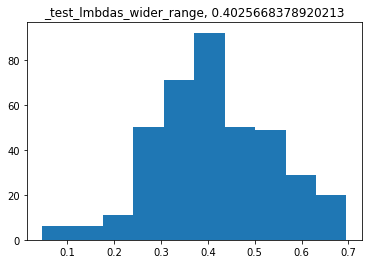

In [35]:
plt.hist(corr_obj.data['test_cc_raw'])
plt.title(f"{iden}, {np.median(corr_obj.data['test_cc_raw'])}")

Text(0.5, 1.0, '_test_lmbdas_wider_range')

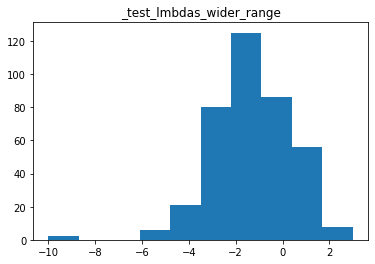

In [24]:
lmbdas = np.log10(corr_obj.data['opt_lmbdas'])
plt.hist(lmbdas)
plt.title(iden)

In [26]:
np.median(corr_obj.data[corr_obj.data['layer']==2]['test_cc_raw'])

0.4376591917199979

Text(0.5, 1.0, '_test_lmbdas, 0.4014892749859427')

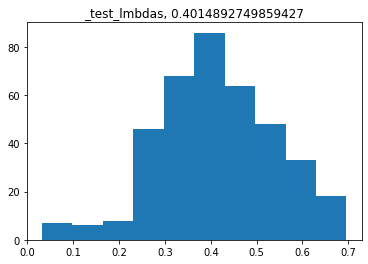

In [33]:
plt.hist(corr_obj.data['test_cc_raw'])
plt.title(f"{iden}, {np.median(corr_obj.data['test_cc_raw'])}")

Text(0.5, 1.0, '_test_lmbdas')

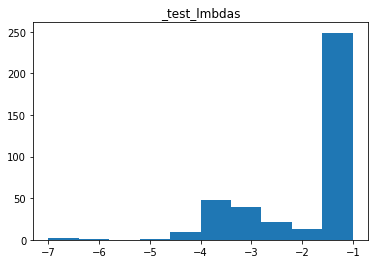

In [27]:
lmbdas = np.log10(corr_obj.data['opt_lmbdas'])
plt.hist(lmbdas)
plt.title(iden)

In [ ]:
normalizer_filename = 'modified_bins_normalizer.csv'

# 
model_name = 'deepspeech2'
# model_name = 'speech2text'
# model_name = 'wav2vec2'
# model_name = 'whisper_tiny'
# model_name = 'whisper_base'
# model_name = 'wav2letter_modified'
# 
id = '_reset_weights53'
# id = '_reset_weights53_l0'
# id = '_reset_weights53_l1'
# id = '_reset_weights53_features'

corr_obj = Correlations(
    model_name=model_name+id,
    normalizer_filename=normalizer_filename
    )
print(f"'{model_name}'")
print(corr_obj.data['session'].unique().size)

In [ ]:
corr_obj.data['bin_width'].unique()

In [ ]:
corr_obj.data['bin_width'].unique()

In [ ]:
# normalizer_filename = 'modified_bins_normalizer.csv'
# model_names = [
#     'deepspeech2', 'speech2text', 'wav2vec2',
#     'whisper_base', 'whisper_tiny', 'wav2letter_modified',
#     ]
# iden = '_test_all_trials'
# for model_name in model_names:
# 	corr_obj = Correlations(
# 		model_name=model_name+iden,
# 		normalizer_filename=normalizer_filename
# 		)
# 	print(f"Deleting file for {model_name}")
# 	filepath = corr_obj.get_filepath()
# 	os.remove(filepath)
# 	print(f"Removed: {filepath}")

In [ ]:
sessions_done = corr_obj.data['session'].unique()

sessions = np.array([180627., 180719., 180720., 180731., 180807., 180808., 180814.,
                190606., 191113., 191115., 191121., 191125., 191206., 191210.,
                200205., 200206., 200207., 200213., 200313.])
sessions_done[np.isin(sessions_done, sessions)].shape

In [ ]:
corr_obj.data['session'].unique()

In [ ]:
model_name = 'deepspeech2'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'test_all_trials',
    'test_all_trials_l1',
    'test_all_trials_l0',

    ]
# output_identifier = 'glm'

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename,
                            #    output_identifier=output_identifier
        )

In [ ]:
model_name = 'speech2text'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'test_all_trials',
    'test_all_trials_l1',
    'test_all_trials_l0',
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

In [4]:
# model_name = 'deepspeech2'
# model_name = 'speech2text'
# model_name = 'wav2vec2'
# model_name = 'whisper_base'
# model_name = 'whisper_tiny'
# model_name = 'wav2letter_modified'
model_names = [
    # 'deepspeech2',
	'speech2text', 'wav2vec2',
    'whisper_base', 'whisper_tiny', 'wav2letter_modified',
    ]
for model_name in model_names:
    output_id = 0
    normalizer_filename = 'modified_bins_normalizer.csv'
    ids = [
		'test_all_trials',
		'test_all_trials_10',
		'test_all_trials_40',
		'test_all_trials_60', 
		'test_all_trials_80',
		'test_all_trials_100',
		'test_all_trials_200',
		'test_all_trials_300',
		'test_all_trials_400',
		'test_all_trials_500',
		'test_all_trials_600',
		'test_all_trials_700',
		'test_all_trials_800',
        ]
    # output_identifier = 'reset_weights_all_trials2'
    Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename,
                                # output_identifier=output_identifier
            )

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_test_all_trials_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_test_all_trials_corr_results.csv
Writing back...!
Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2vec2_test_all_trials_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2vec2_test_all_trials_corr_results.csv
Writing back...!
Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_test_all_trials_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_test_all_trials_corr_results.csv
Writing back...!
Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_test_all_trials_corr_results.csv
reading fro

In [ ]:


# model_name = 'whisper_base'
# model_name = 'whisper_tiny'
model_name = 'wav2letter_modified'
# model_name = 'wav2vec2'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'test_all_trials',
    # 'test_all_trials_features',
    ]
# output_identifier = 'test_all_trials_old'
Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename,
							# output_identifier=output_identifier
		)

In [ ]:
# os.remove(corr_obj.get_filepath())

In [4]:


# model_name = 'whisper_base'
# model_name = 'whisper_tiny'
# model_name = 'wav2letter_modified'
# model_name = 'wav2vec2'
model_name = 'w2v2_audioset'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'test_lmbdas_delays',
    'test_lmbdas_delays_features',
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/w2v2_audioset_test_lmbdas_delays_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/w2v2_audioset_test_lmbdas_delays_corr_results.csv
Writing back...!


### significant sessions

In [ ]:
normalizer_filename = 'modified_bins_normalizer.csv'
model_name = 'wav2vec2'
id = '_bins_corrected_100'

corr_obj = Correlations(
    model_name=model_name+id,
    normalizer_filename=normalizer_filename
    )

bin_width = 20
threshold = corr_obj.get_normalizer_threshold(bin_width=bin_width)
corr_obj.get_significant_sessions(threshold)

In [ ]:
subjects = np.array([180627., 180719., 180720., 180731., 180807., 180808., 180814.,
                    190606., 191113., 191115., 191121., 191125., 191206., 191210.,
                    200205., 200206., 200207., 200213., 200313.]).astype(int).astype(str)

In [ ]:
subjects

### Number of sig. channels as function of bin_width

In [ ]:
normalizer_filename = 'modified_bins_normalizer.csv'
model_name = 'wav2vec2'
id = '_bins_corrected_100'

corr_obj = Correlations(
    model_name=model_name+id,
    normalizer_filename=normalizer_filename
    )

In [ ]:
sig_sessions = corr_obj.get_significant_sessions()

In [ ]:
sig_sessions.size

In [ ]:
from auditory_cortex.neural_data import NeuralMetaData
metadata = NeuralMetaData()
sessions_available = metadata.get_all_available_sessions()
sessions_available = sessions_available.astype(np.float32)
sessions_available.size

In [ ]:
sessions_available

In [ ]:
sig_sessions[np.isin(sig_sessions, sessions_available, invert=True)]

In [ ]:
sig_sessions.size

In [ ]:
sessions_available.size

In [ ]:
from auditory_cortex import bad_sessions

sig_sessions[np.isin(sig_sessions, bad_sessions)]

In [ ]:
# area = 'core'
area = 'belt'
bin_width = 20
# threshold = 0.061
poisson_dist = True

bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    threshold = corr_obj.get_normalizer_threshold(bin_width=bin_width, poisson_normalizer=poisson_dist)
    print(f"At bin_width: {bin_width}, threshold={threshold:.2f}")
    area_sessions = corr_obj.metadata.get_all_sessions(area)

    total_channels = 0
    select_data = corr_obj.get_selected_data(
            sessions=area_sessions,
            bin_width=bin_width, 
            layer=7,
            delay=0,
            threshold=threshold,
            N_sents=499
        )

    print(select_data.shape)



In [ ]:
total_channels

### Delete right away...

### All networks Best layerss..

In [ ]:
from auditory_cortex.plotters.correlation_plotter import RegPlotter

In [ ]:
RegPlotter.bar_plot_best_layer_all_networks(area='core',
                    identifier='_sampling_rate_opt_neural_delay')

In [ ]:
RegPlotter.bar_plot_best_layer_all_networks(area='core',
                    identifier='_sampling_rate_opt_neural_delay', threshold=0.061)

In [ ]:
RegPlotter.bar_plot_best_layer_all_networks(area='belt', 
                threshold=0.061,
                identifier='_sampling_rate_opt_neural_delay',
                )

In [ ]:
RegPlotter.bar_plot_best_layer_all_networks(area='belt', 
                threshold=0.061,
                identifier='_sampling_rate_opt_neural_delay',
                )

In [ ]:
from auditory_cortex import model_names
identifier = '_sampling_rate_opt_neural_delay'
area = 'core'
bin_width = 20
delay = 0
threshold = 0.061




dist_peak_layer_each_model = {}
for model_name in model_names: 

    corr_obj = Correlations(model_name+identifier)
    # print(f"Object created for {model_name}, with id {identifier}")
    corr_dict = corr_obj.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width,
        delay=0, threshold=threshold,
        normalized=True
    )
    layer_medians = {np.median(v):k for k,v in corr_dict.items()}
    peak_median = max(layer_medians)
    peak_layer = layer_medians[peak_median]
    dist_peak_layer_each_model[model_name] = corr_dict[peak_layer]

# baseline is same for all networks..
corr_baseline = corr_obj.get_baseline_corr_for_area(neural_area=area,
                                                    threshold=threshold)
dist_peak_layer_each_model['baseline'] = corr_baseline


In [ ]:
dist_peak_layer_each_model.keys()

In [ ]:
import scipy
p_values = {}
statistic = {}
for model_name in model_names:
    out = scipy.stats.wilcoxon(
        x = dist_peak_layer_each_model[model_name], 
        y=dist_peak_layer_each_model['baseline']
    )
    p_values[model_name] = out.pvalue
    statistic[model_name] = out.statistic
    

In [ ]:
p_values

In [ ]:
dist_peak_layer_each_model[model_names[0]].shape

In [ ]:
dist_peak_layer_each_model['baseline'].shape

In [ ]:
dist_peak_layer_each_model[model_names[0]]

### All network layers at bin_width=20

In [ ]:
model_name = 'wav2vec2'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'wav2vec2'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'wav2letter_modified'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'wav2letter_modified'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'deepspeech2'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'deepspeech2'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'speech2text'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'speech2text'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'whisper_tiny'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'whisper_tiny'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'whisper_base'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

In [ ]:
model_name = 'whisper_base'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

### Network layer at all bin_widths

In [ ]:
model_name = 'wav2letter_modified'
identifier = '_opt_neural_delay'
corr_obj = Correlations(model_name+identifier)

#### with different normalizer and DIFFERENT threshold as well...

##### deepspeech2

In [ ]:
model_name = 'deepspeech2'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

In [ ]:
model_name = 'deepspeech2'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

##### speech2text

In [ ]:
model_name = 'speech2text'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

In [ ]:
model_name = 'speech2text'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

##### wav2vec2

In [ ]:
model_name = 'wav2vec2'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)
corr_obj.set_normalizers()

In [ ]:
model_name = 'wav2vec2'
layer = 7
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

In [ ]:
model_name = 'wav2vec2'
layer = 7
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

##### wav2letter_modified

In [ ]:
model_name = 'wav2letter_modified'
layer = 6
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

In [ ]:
model_name = 'wav2letter_modified'
layer = 6
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

#### whisper_tiny

In [ ]:
model_name = 'whisper_tiny'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)
corr_obj.set_normalizers()

In [ ]:
model_name = 'whisper_tiny'
layer = 4
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

In [ ]:
model_name = 'whisper_tiny'
layer = 4
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

##### whisper_base

In [ ]:
model_name = 'whisper_base'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)
corr_obj.set_normalizers()

In [ ]:
model_name = 'whisper_base'
layer = 4
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

In [ ]:
model_name = 'whisper_base'
layer = 4
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

#### with different normalizer at each bin_width..

##### deepspeech2

In [ ]:
model_name = 'deepspeech2'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)

In [ ]:
corr_obj.set_normalizers()

In [ ]:
model_name = 'deepspeech2'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'deepspeech2'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

##### speech2text

In [ ]:
model_name = 'speech2text'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)
corr_obj.set_normalizers()

In [ ]:
model_name = 'speech2text'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'speech2text'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

##### wav2vec2

In [ ]:
model_name = 'wav2vec2'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)
corr_obj.set_normalizers()

In [ ]:
model_name = 'wav2vec2'
layer = 7
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'wav2vec2'
layer = 7
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

#### with same normalizer at all bin_widths...

In [ ]:
corr_baseline = corr_obj.get_baseline_corr_for_area(neural_area='core')

In [ ]:
model_name = 'wav2letter_modified'
layer = 6
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'wav2letter_modified'
layer = 6
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'speech2text'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'speech2text'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'deepspeech2'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'deepspeech2'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'wav2vec2'
layer = 7
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'wav2vec2'
layer = 7
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'whisper_tiny'
layer = 4
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'whisper_tiny'
layer = 4
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'whisper_base'
layer = 4
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

In [ ]:
model_name = 'whisper_base'
layer = 4
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

#### Shaded Line plots...

In [ ]:
import os
import numpy as np
import matplotlib.pylab as plt
from auditory_cortex.analyses import Correlations
from palettable.colorbrewer import qualitative
from auditory_cortex.neural_data import NeuralMetaData
from auditory_cortex.plotters.plotter_utils import PlotterUtils
from auditory_cortex import results_dir
colors = qualitative.Dark2_8.mpl_colors
from utils_jgm.tikz_pgf_helpers import tpl_save

def plot_shaded_line(data_dict, color, alpha=0.2, low_percentile=25, 
    high_percentile=75, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    medians = []
    x_coordinates = []
    lower_percentiles = []
    higher_percentiles = []
    for layer_ID, layer_data in data_dict.items():
        medians.append(np.median(layer_data))
        x_coordinates.append(layer_ID)
        lower_percentiles.append(np.percentile(layer_data, low_percentile))
        higher_percentiles.append(np.percentile(layer_data, high_percentile))
    
    ax.plot(x_coordinates, medians, color=color)
    ax.fill_between(x=x_coordinates, y1=lower_percentiles, y2=higher_percentiles,
    alpha=alpha, color=color)
    

def save_tikz(file_name):
    file_name = file_name+'.tex'
    tikz_dir = os.path.join(results_dir, 'tikz_plots')
    if not os.path.exists(tikz_dir):
        os.makedirs(tikz_dir)
    extra_axis_parameters = {
        'width=\\figwidth',
        'height=\\figheight',
        'every x tick label/.append style={rotate=90}',
        'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
    }
    tpl_save(
        filepath=os.path.join(tikz_dir, file_name),
        extra_axis_parameters=extra_axis_parameters,
        tex_relative_path_to_data='pngs',
        extra_lines_start={
            '\\providecommand{\\figwidth}{5.7in}%',
            '\\providecommand{\\figheight}{2.0in}%',
            '\\providecommand{\\thisXticklabelopacity}{1.0}%',
        },
    )


In [ ]:
from auditory_cortex.analyses import Correlations
model_name = 'wav2letter_modified'
# res = 'wav2vec2'

# res = 'whisper_tiny'
# res = 'whisper_test'
# res = 'whisper_small'
# res = 'whisper_base'
id = '_opt_neural_delay'
result = model_name + id
corr_obj = Correlations(result)
len(corr_obj.get_all_sessions())

### Core

In [ ]:
model_names = ['wav2letter_modified', 'wav2vec2',
'deepspeech2', 'speech2text', 'whisper_tiny', 
'whisper_base']
id = '_opt_neural_delay'
layer_wise_data = {}
mdata = NeuralMetaData()
area = 'core'
sessions = mdata.get_all_sessions(area=area)

for model_name in model_names:

    result = model_name + id
    corr_obj = Correlations(result)
    bin_width = 20
    delay = 0
    N_sents = 499
    threshold = 0.068
    normalized=True
    ax, layer_spread = corr_obj.box_plot_correlations(
        sessions=sessions,
        bin_width=bin_width, delay=delay, threshold=threshold,
        N_sents=N_sents, normalized=normalized
        )
    layer_wise_data[model_name] = layer_spread



In [ ]:
def get_all_layers_for_bin_width(self, bin_width=20, delay=0, 
        N_sents=499):

        



In [ ]:
plot_line_with_shaded_region()

In [ ]:
for ind, (model_name, layer_spread) in enumerate(layer_wise_data.items()):
    alpha = 0.2
    color = colors[ind]
    plot_shaded_line(layer_spread, color=color, alpha=alpha)
    plt.title(f"{model_name}, bw-{bin_width}ms, area-{area}")
    plt.xlabel(f"Layer IDs")
    plt.ylabel(f"$\\rho$")
    plt.ylim([0,1])
    # save_tikz(f"correlation-layerwise-{area}-{model_name}")

    filepath = os.path.join(results_dir, 'tikz_plots', f"correlation-layerwise-{area}-{model_name}.tex")
    PlotterUtils.save_tikz(filepath)

### Belt

In [ ]:
model_names = ['wav2letter_modified', 'wav2vec2',
'deepspeech2', 'speech2text', 'whisper_tiny', 
'whisper_base']
id = '_opt_neural_delay'
layer_wise_data = {}
mdata = NeuralMetaData()
area = 'belt'
sessions = mdata.get_all_sessions(area=area)

for model_name in model_names:

    result = model_name + id
    corr_obj = Correlations(result)
    bin_width = 20
    delay = 0
    N_sents = 499
    threshold = 0.068
    normalized=True
    ax, layer_spread = corr_obj.box_plot_correlations(
        sessions=sessions,
        bin_width=bin_width, delay=delay, threshold=threshold,
        N_sents=N_sents, normalized=normalized
        )
    layer_wise_data[model_name] = layer_spread



In [ ]:
for ind, (model_name, layer_spread) in enumerate(layer_wise_data.items()):
    alpha = 0.2
    color = colors[ind]
    plot_shaded_line(layer_spread, color=color, alpha=alpha)
    plt.title(f"{model_name}, bw-{bin_width}ms, area-{area}")
    plt.xlabel(f"Layer IDs")
    plt.ylabel(f"$\\rho$")
    plt.ylim([0,1])
    # save_tikz(f"correlation-layerwise-{area}-{model_name}")

    filepath = os.path.join(results_dir, 'tikz_plots', f"correlation-layerwise-{area}-{model_name}.tex")
    PlotterUtils.save_tikz(filepath)

In [ ]:

results_dir

In [ ]:
np.median(layer_spread[0])

In [ ]:
np.percentile(layer_spread[0], 95)

### Combine results and ready to use....

In [ ]:
from auditory_cortex.plotters.plotter_utils import PlotterUtils

i = 0
res = PlotterUtils.model_names[i]

print(f"For {res} sessions done: ")
id = '_randn_weights'
# id = '_weights_shuffled_l0'
# id = '_weights_shuffled_l1'
res += id
corr_obj = Correlations(res,
                        # normalizer_filename='modified_bins_normalizer.csv'
                        )

filepath = corr_obj.get_filepath()
os.remove(filepath)

In [ ]:
def combine_and_ready(
        model_name, identifiers_list, output_id, normalizer_filename=None
    ):
    """Merges results for all identifiers, copies layer types and
    sets normalizer."""

    Correlations.merge_correlation_results(
            model_name=model_name,
            file_identifiers=identifiers_list,
            idx=output_id
        )

    identifier = identifiers_list[output_id]
    Correlations.add_layer_types(
        model_name, identifier
    )

    res = model_name + '_' + identifiers_list[output_id]
    corr_obj = Correlations(res, normalizer_filename=normalizer_filename)

    corr_obj.set_normalizers()

#### whisper_small ...

In [ ]:
res = 'whisper_small'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_random_weights'
id = '_random_weights'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    # print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
corr_obj.set_normalizers()

In [ ]:
results_dir

#### wav2letter_modified...

In [ ]:
res = 'wav2letter_modified'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_random_weights'
id = '_weights_shuffled'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
res = 'wav2letter_modified'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_bins_corrected_10'
id = '_bins_corrected_100'
# id = '_bins_corrected_300'
# id = '_bins_corrected_500'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
model_name = 'wav2letter_modified'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'bins_corrected_poiss',
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

In [ ]:
res = 'wav2letter_modified'

print(f"For {res} sessions done: ")
id = '_sampling_100'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

#### wav2vec2

In [ ]:
res = 'wav2vec2'

print(f"For {res} sessions done: ")
# id = '_sampling_100'
# id = '_random_weights'
id = '_weights_shuffled'
# id = '_weights_shuffled_features'
# id = '_random_weights_features'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
model_name = 'wav2vec2'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
        # 'bins_corrected_100',
ids = [
        'bins_corrected_poiss',
        'bins_corrected_poiss_features'
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

In [ ]:
# res = 'wav2letter_modified'
res = 'wav2vec2'
# res = 'speech2text'
# res = 'deepspeech2'

# res = 'whisper_tiny'
# res = 'whisper_test'
# res = 'whisper_small'
# res = 'whisper_base'
print(f"For {res} sessions done: ")
id = '_sampling_rate_opt_neural_delay'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
# id = '_verification_20'
# id = '_verification_20_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
res = 'wav2vec2'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_bins_corrected_features_80'
# id = '_bins_corrected_features_60'
# id = '_bins_corrected_features_40'
# id = '_bins_corrected_features_20'
# id = '_bins_corrected_features_10'
# id = '_bins_corrected_features_100'
# id = '_bins_corrected_features_300'
# id = '_bins_corrected_features_500'
id = '_bins_corrected_features_700'
# id = '_bins_corrected_10'

normalizer_filename = 'modified_bins_normalizer.csv'
res += id
corr_obj = Correlations(res, normalizer_filename=normalizer_filename)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
corr_obj.norm_obj.dataframe['bin_width'].unique()

#### speech2text

In [ ]:

res = 'speech2text'
print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_weights_shuffled'
# id = '_weights_shuffled_l0'
# id = '_bins_corrected_poiss'
# id = '_bins_corrected_poiss_0'
id = '_bins_corrected_poiss_1'

# id = '_random_weights_l1'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
model_name = 'speech2text'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'bins_corrected_poiss',
    'bins_corrected_poiss_0',
    'bins_corrected_poiss_1'
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

In [ ]:
# res = 'wav2letter_modified'
res = 'speech2text'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_time_averaged_no_grid'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
res = 'speech2text'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_bins_corrected_100'
id = '_bins_corrected_l1_80'
id = '_bins_corrected_l1_60'
id = '_bins_corrected_l1_40'
id = '_bins_corrected_l1_20'
id = '_bins_corrected_l1_10'
id = '_bins_corrected_l1_100'
id = '_bins_corrected_l1_300'
id = '_bins_corrected_l1_500'
id = '_bins_corrected_l1_700'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
corr_obj.get_filepath()

In [ ]:
# res = 'wav2letter_modified'
# res = 'wav2vec2'
# res = 'speech2text'
res = 'deepspeech2'

# res = 'whisper_tiny'
# res = 'whisper_test'
# res = 'whisper_small'
# res = 'whisper_base'

print(f"For {res} sessions done: ")
id = '_sampling_100'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

#### deepspeech2

In [ ]:
res = 'deepspeech2'
# id = '_random_weights'

# id = '_weights_shuffled'
# id = '_weights_shuffled_l0'
id = '_weights_shuffled_l1'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
res += id
corr_obj = Correlations(res)

bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {data['layer'].unique()}")

In [ ]:
model_name = 'deepspeech2'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'bins_corrected_poiss',
    'bins_corrected_poiss_0',
    'bins_corrected_poiss_1'
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

In [ ]:
# res = 'wav2letter_modified'
res = 'deepspeech2'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_time_averaged_no_grid'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    # print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
res = 'deepspeech2'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_bins_corrected_100'
id = '_bins_corrected_l0_80'
id = '_bins_corrected_l0_60'
id = '_bins_corrected_l0_40'
id = '_bins_corrected_l0_20'
id = '_bins_corrected_l0_10'
# id = '_bins_corrected_l0_100'
# id = '_bins_corrected_l0_300'
# id = '_bins_corrected_l0_500'
# id = '_bins_corrected_l0_700'


res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

#### whisper_tiny

In [ ]:
res = 'whisper_tiny'
# res = 'whisper_test'
# res = 'whisper_small'
# res = 'whisper_base'
print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_random_weights'
id = '_weights_shuffled'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {data['layer'].unique()}")

In [ ]:
model_name = 'whisper_tiny'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
        'bins_corrected_poiss',
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

In [ ]:
# res = 'wav2letter_modified'
res = 'whisper_tiny'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_time_averaged_no_grid'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
res = 'whisper_tiny'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_bins_corrected_100'
# id = '_bins_corrected_10'

res += id
corr_obj = Correlations(res)

bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {data['layer'].unique()}")

#### whisper_base

In [ ]:

res = 'whisper_base'
print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_random_weights'
id = '_weights_shuffled'

res += id
corr_obj = Correlations(res)

# # bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
model_name = 'whisper_base'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
        'bins_corrected_poiss',
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)


In [ ]:
# res = 'wav2letter_modified'
res = 'whisper_base'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_time_averaged_no_grid'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    # print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

In [ ]:
res = 'whisper_base'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_bins_corrected_100'



res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {data['layer'].unique()}")

In [ ]:
corr_obj.set

In [ ]:
corr_obj.get_normalizer_threshold(20, False)

#### Earlier made plots..

In [ ]:
corr_obj.data[corr_obj.data['bin_width']==5]

In [ ]:
corr_obj.data[corr_obj.data['bin_width']==5]

In [ ]:
corr_obj.data[corr_obj.data['bin_width']==20]

In [ ]:
corr_obj.get_selected_data()['layer'].unique()

In [ ]:
corr_file = res
filename = f'{corr_file}_corr_results.csv'
corr_file_path = os.path.join(saved_corr_dir, filename)
data1 = pd.read_csv(corr_file_path)

In [ ]:
# model_name = 'whisper_tiny'
# model_name = 'whisper_test'
# model_name = 'whisper_base'
model_name = 'wav2letter_modified'
id = 'sampling_rate_opt_neural_delay'

# id = 'opt_neural_delay'
filler = ''
if id != '':
    filler = '_'
model_identifier = model_name + filler + id
# add layer types...
print("adding layer types...")
CorrelationUtils.add_layer_types(model_name, id)
print("Copying normalizer...")
CorrelationUtils.copy_normalizer(model_identifier)

In [ ]:
res = 'whisper_tiny'
# res = 'whisper_test'
# res = 'wav2vec2'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

In [ ]:
res = 'whisper_base'
# res = 'whisper_test'
# res = 'wav2vec2'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

In [ ]:
# res = 'whisper_tiny'
res = 'wav2vec2'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

In [ ]:
# res = 'whisper_tiny'
res = 'wav2letter_modified'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

In [ ]:
# res = 'whisper_tiny'
res = 'speech2text'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

In [ ]:
res = 'deepspeech2'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

In [ ]:
for layer, dist in out[1].items():
    print(f"Layer-{layer}, median: {np.median(dist):.2f}, max: {np.max(dist):.2f}")

##### adding layer types and normalizer....

In [ ]:
corr_obj.add_layer_types('mix')
CorrelationUtils.copy_normalizer(res)

In [ ]:
model_name = 'ensemble'
id = '_opt_neural_delay'
model_name += id
session = 200206
threshold = 0.068
delay = 48
corr_obj = analysis.Correlations(model_name)
ax = corr_obj.box_plot_correlations(threshold=threshold,
                                    delay=delay,
                                    # normalized=True,
                                    # sessions=[session]
                                    )

In [ ]:
data_layers = ax[1]
for k, v in data_layers.items():
    print(f"L-{k}, median: {np.median(v):.2f}, max: {np.max(v):.2f}")

In [ ]:
bin_width = 20
model = models_list[0]
model_name = model['model_name'] + '_opt_neural_delay'
corr_obj = analysis.Correlations(model_name)
select_data = corr_obj.get_session_data(
            threshold=threshold, bin_width=bin_width
        )

# ax = corr_obj.box_plot_correlations(threshold=threshold,
#                                     delay=delay,
#                                     # normalized=True,
#                                     # sessions=[session]
#                                     )


### Evaluating the ensemble model...

##### function definations...

In [ ]:
models_list = [
    {
        'model_name': 'wav2letter_modified',
        'layer': 6,
        'opt_neural_delay': 37.75,
        'layer_type': 'conv'
    },
    {
        'model_name': 'speech2text',
        'layer': 4,
        'opt_neural_delay': 49.83,
        'layer_type': 'transformer'
    },
    {
        'model_name': 'wav2vec2',
        'layer': 7,
        'opt_neural_delay': 49.23,
        'layer_type': 'transformer'
    },
    {
        'model_name': 'deepspeech2',
        'layer': 2,
        'opt_neural_delay': 54.73,
        'layer_type': 'rnn'
    },
    {
        'model_name': 'ensemble',
        'layer': 0,
        'opt_neural_delay': 54.73,
        'layer_type': 'mix'
    },
]
def plot_box_and_whiskers(data_spread, colors, ax=None, lw=1.5):
    """
    Args:
        data_spread (dict): dict of distributions... 
        colors (list): list of colors, len(colors)=len(data_spread) 
    """
    if ax is None:
        fig, ax = plt.subplots()
        # plotting function
    median_lines = dict(color='k', linewidth=lw*2)  
    other_lines = dict(color='k', linewidth=lw)
    bplot = ax.boxplot(data_spread.values(), positions = np.arange(1, len(data_spread.keys())+1),
                labels=data_spread.keys(),
                whis=[5,95],
                capprops=other_lines,
                whiskerprops=other_lines,
                medianprops=median_lines,
                patch_artist=True
                )
    
    # setting the colors of the boxes as per layer type..
    for color, box, flier in zip(colors, bplot['boxes'], bplot['fliers']):
        box.set(
            facecolor = color,
            linewidth=lw
        )
        flier.set(
                markeredgecolor='k',
                markerfacecolor=color,
        )
    return ax


def compare_ensemble(models_list, threshold=0.068, bin_width=20, 
                     normalized=False, verbose=True):
    delay = 0
    column = 'test_cc_raw'
    aug_title = ''
    if normalized:
        column = 'normalized_test_cc'
        aug_title = ', norm'

    data_spread = {}
    colors = []
    for model in models_list:
        # model = models_list[0]
        model_name = model['model_name']
        if 'ensemble' in model_name:
            delay = 48
        layer_type = model['layer_type']
        layer = model['layer']
        corr_obj = analysis.Correlations(model_name+'_opt_neural_delay')
        select_data = corr_obj.get_selected_data(
                    threshold=threshold, bin_width=bin_width, delay=delay, N_sents=499,
                    layer=layer
                )
        ids = select_data[select_data['layer']==layer].index
        data_spread[model_name] = np.array(select_data.loc[ids, column]).squeeze()
        colors.append(corr_obj.fill_color[layer_type])
        if verbose:
            print(f"{model_name:20}: Med = {np.median(data_spread[model_name]):.2f},\
            max: {np.max(data_spread[model_name]):.2f}")
    # plotting box and whiskers
    ax = plot_box_and_whiskers(data_spread, colors)
    ax.set_title(f"Ensemble vs individual models{aug_title}")
    ax.set_xlabel('models')
    ax.grid(color='grey', axis='y', linestyle='-', linewidth = 0.5, alpha=0.5)

    return ax

##### plots

In [ ]:
ax= compare_ensemble(models_list=models_list,
                normalized=False
                )

In [ ]:
ax = compare_ensemble(models_list=models_list,
                normalized=True
                )

### merge corr results...

In [ ]:
model_name = 'wav2vec2'
output_id = 1

ids = [
        'all_opt_delays_feature_extractor',
        'all_opt_delays',
    ]
# ids = [
#         'opt_neural_delay_1_third_feature_extractor',
#         'opt_neural_delay_1_third',

#     ]
CorrelationUtils.merge_correlation_results(
        model_name=model_name,
        file_identifiers=ids,
        idx=output_id
    )

### add layer types and copy normalizer..

In [ ]:
# model_name = 'wav2letter_modified'
# model_name = 'speech2text'
# model_name = 'deepspeech2'


# model_name = 'ensemble'
# model_name = 'whisper_tiny'
model_name = 'whisper_base'
# model_name = 'wav2vec2'


ids = [
    # 'robust1'
    # 'normal_109'
    # 'robust_26'
    # 'opt_neural_delay'
    'sampling_rate_opt_neural_delay'
    # 'opt_neural_delay_1_third',
    # 'opt_neural_delay_2_third',
    # 'opt_neural_delay_3_third'
]

# id = 'opt_neural_delay_2_third'

for id in ids:
    filler = ''
    if id != '':
        filler = '_'
    model_identifier = model_name + filler + id

    # add layer types...
    print("adding layer types...")
    CorrelationUtils.add_layer_types(model_name, id)

    print("Copying normalizer...")
    CorrelationUtils.copy_normalizer(model_identifier)



In [ ]:
# model_name = 'speech2text'
model_name = 'deepspeech2'


id = '_sampling_rate_opt_neural_delay'
corr_file = model_name + id

In [ ]:
filename = f'{corr_file}_corr_results.csv'
corr_file_path = os.path.join(saved_corr_dir, filename)
data1 = pd.read_csv(corr_file_path)
print(f"Reading file from: \n {corr_file_path}")
# data1['session'].unique()

ids = data1[data1['session']==0].index
data1.drop(ids, inplace=True)
print(f"Writing back..")
data1.to_csv(corr_file_path, index=False)


In [ ]:
# session = sessions[0]
select_data = data1[data1['session']==session]
channels = select_data['channel'].unique()

In [ ]:
channels

In [ ]:
ch = channels[0]

In [ ]:

ids = select_data[select_data['channel'] == ch].index

# norm = data2[(data2['session']==session) &(data2['channel']==ch)]['normalizer'].head(1).item() 

# data1.loc[ids, 'normalizer'] = norm

In [ ]:
data2[(data2['session']==session) &(data2['channel']==ch)]['normalizer'].head(1).item() 


In [ ]:

for session in sessions:


data1.to_csv(corr_file_path, index=False)
print(f"Normalizer updated and written back to file: \n {corr_file_path}")

In [ ]:
corr_obj

### analyzing...

In [ ]:
# model_name = 'ensemble'
# model_name = 'wav2letter_modified'
# model_name = 'speech2text'
# model_name = 'wav2vec2'
model_name = 'deepspeech2'
# id = 'opt_neural_delay_1_third'
id = 'opt_neural_delay'
# id = 'robust1'
# id = 'normal_109'
# id = ''
filler = ''
if id != '':
    filler = '_'
session = 200206
model_identifier = model_name + filler + id
corr_obj = analysis.Correlations(model_identifier)
ax = corr_obj.box_plot_correlations(threshold=0.068,
                                    # normalized=True
                                    # sessions=[session]
                                    )
# len(corr_obj.get_all_sessions())

In [ ]:
data_layers = ax[1]
for k, v in data_layers.items():
    print(f"L-{k}, median: {np.median(v):.2f}, max: {np.max(v):.2f}")

In [ ]:
print(f"Mean optimal delays \n for '{model_identifier}', :")
corr_obj.get_selected_data(
            # layer=6,
            # session=200206,
            bin_width=20, delay=0, N_sents=499, threshold=0.1
        ).groupby(['layer'], as_index=False).mean()['opt_delays']

In [ ]:
# CorrelationUtils.copy_normalizer(model_identifier)

In [ ]:
models_list = [
    {
        'model_name': 'wav2letter_modified',
        'layer': 6,
        'opt_neural_delay': 37.75,
    },
    {
        'model_name': 'speech2text',
        'layer': 4,
        'opt_neural_delay': 49.83,
    },
    # {
    #     'model_name': 'wav2vec',
    #     'layer': 8
    # },
    {
        'model_name': 'wav2vec2',
        'layer': 7,
        'opt_neural_delay': 49.23,
    },
    {
        'model_name': 'deepspeech2',
        'layer': 2,
        'opt_neural_delay': 54.73,
    },
]

opt_delays = []
for model in models_list:
    opt_delays.append(model['opt_neural_delay'])
avg_delay = sum(opt_delays)/len(opt_delays)
avg_delay = int(avg_delay + 0.5) 
# avg_delay = int(avg_delay/5.0 + 0.5)
print(avg_delay)

In [ ]:
int(avg_delay/5.0 + 0.5)*5

In [ ]:
model_identifier

In [ ]:
corr_obj = analysis.Correlations(model_identifier)

ax = corr_obj.box_plot_correlations(threshold=0.1)

In [ ]:
from auditory_cortex import analysis

model_name = 'wav2letter_modified'
# model_name = 'wav2vec'
# model_name = 'deepspeech2'
# id = 'opt_neural_delay_3_third'
# id = 'opt_neural_delay_2_third'
# id = 'normal_109'
id = 'robust_26'

filler = ''
if id != '':
    filler = '_'
model_identifier = model_name + filler + id
corr = analysis.Correlations(model_name=model_identifier)
corr.get_all_sessions().shape

In [ ]:
import os
import pandas as pd
from auditory_cortex import saved_corr_dir

strf_file = 'STRF_3_third_corr_results.csv'
file_path = os.path.join(saved_corr_dir, strf_file)
df = pd.read_csv(file_path)
len(df['session'].unique())

In [ ]:
from auditory_cortex import config
from auditory_cortex import subject_to_session


normalizer_model = 'wav2letter_modified_normalizer2'

corr_obj = analysis.Correlations(normalizer_model)

data_dir = config['neural_data_dir']
bad_sessions = config['bad_sessions']

## read the sessions available in data_dir
sessions = np.array(os.listdir(data_dir))
sessions = np.delete(sessions, np.where(sessions == "out_sentence_details_timit_all_loudness.mat"))
for s in bad_sessions:
    sessions = np.delete(sessions, np.where(sessions == s))
sessions = np.sort(sessions)

In [ ]:

corr_obj.get_selected_data(bin_width=20, delay=0, N_sents=499, threshold=0.068)['session'].unique().shape

In [ ]:
# session = sessions[0]
threshold = 0.068
num_sig_sessions = 0
total_num_channels = 0
total_sig_channels = 0
for session in sessions:
    channels = os.listdir(os.path.join(data_dir,session))
    num_channels = len(channels)
    subject = channels[0][:1]
    corr_channels = corr_obj.get_all_channels(session)
    sig_channels = corr_obj.get_good_channels(session, threshold=threshold)

    total_num_channels += num_channels
    total_sig_channels += len(sig_channels)
    if len(sig_channels) > 0:
        num_sig_sessions += 1
    sub = [k for k,v in subject_to_session.items() if int(session) in v][0]
    # print(session, end=', ')
    # print(num_channels, end=' - ')
    # print(len(corr_channels), end=', ')
    # print(subject, end='')
    # print(sub, end=', ')
    # print(len(sig_channels))

print(f"Total recording sessions: {len(sessions)}")
print(f"Number of sig sessions: {num_sig_sessions}")
print(f"Total recording channels: {total_num_channels}")
print(f"Number of sig channels: {total_sig_channels}")
    


### visualizing box plots...

In [ ]:
session = 200206
threshold = 0.068
normalized_list = [False]#, True]
delta_corr_list = [False]#, True]
bin_width = 20
delay = 0
save_fig = False
y_axis_lim = 0.7

identifier = ''
# model_name = 'wav2letter_modified'
# identifier = 'test7'
# identifier = 'test8'
# identifier = 'test9'

# identifier = 'normalizer2'

# identifier = 'RF_delayed_with_audio_zeropad'
# identifier = 'opt_delay_with_audio_zeropad'
# identifier = 'opt_delay_L6_D0'
# identifier = 'opt_delays_final'
# identifier = 'all_opt_delays'
# identifier = 'opt_neural_delay'


# model = 'wav2letter_modified_opt_delays'
# model = 'wav2letter_modified_RF_delayed'
# model = 'wav2letter_modified'
# model = 'wav2vec2_encoder'
# model = 'wav2vec2_feature_extractor'

# model_name = 'wav2letter_modified'
model_name = 'wav2vec2'
# model_name = 'whisper'
# model_name = 'speech2text'
# identifier = 'opt_delay'
# identifier = 'basic'
# identifier = 'RF_delay'
# identifier = 'neural_delay_only_l0'

# model_name = 'deepspeech2'
# identifier = 'bi_lstm'

# model = 'deepspeech2_bi_lstm'
# model = 'speech2text_initial'
# model = 'speech2text'
# model = 's2t_updated'

# model = 'w2l_original'

# model = 'deepspeech2_rnn_1st_half'
# model = 'deepspeech2_rnn_2nd_half'
# model = 'wav2letter_modified_delay_zeropad'
# delay = 60
filler = ''
if identifier != '':
    filler = '_'
model_identifier = model_name + filler + identifier



for normalized in normalized_list:
    for delta_corr in delta_corr_list:

        corr_obj = analysis.Correlations(model_identifier)


        print(len(np.unique(corr_obj.get_all_sessions())))
        ax, layers_data = corr_obj.box_plot_correlations(
            # session,
            normalized=normalized, threshold=threshold, delta_corr=delta_corr, bin_width=bin_width,
            delay=delay, y_axis_lim=y_axis_lim
            )


        post_str = 'rho'
        if normalized:
            post_str = post_str + '_' + 'normalized'
        if delta_corr:
            post_str = 'delta_' + post_str
        fig_name = f"{model_identifier}_{post_str}.jpg"


        # NIPS_dir = 'C\:\Users\\ahmedb\\Desktop\\PhD\\Academic\\Makin\'s Lab\\auditory_cortex\\Results\\NIPS'
        saved_figures = os.path.join(results_dir, 'saved_figures', 'correlations')
        filepath = os.path.join(saved_figures, model_name, fig_name)
        if save_fig:
            plt.savefig(filepath)

In [ ]:
corr_obj.data['layer'].unique()

In [ ]:
print(f"Results for '{model_identifier}':")
for key, value in layers_data.items():
    print(f"Layer-{key}: {np.median(value):.3f}")

In [ ]:
print(f"Results for '{model_identifier}':")
for key, value in layers_data.items():
    print(f"Layer-{key}: {np.median(value):.3f}")

### Analyzing optimal delays...

In [ ]:
print(f"Mean optimal delays \n for '{model_identifier}', :")
corr_obj.get_selected_data(
            # layer=6,
            # session=200206,
            bin_width=20, delay=0, N_sents=499, threshold=0.1
        ).groupby(['layer'], as_index=False).mean()['opt_delays']

In [ ]:
select_data = corr_obj.get_selected_data(
            layer=6, bin_width=20, delay=0, threshold=0.1, N_sents=499
        ).groupby(['session'], as_index=False).mean()

sessions = select_data['session'].unique()

In [ ]:
s = 5
opt_delays = []

x_coordinates = []
y_coordinates = []
peak_layers = []
peak_median_corr = []   
for session in sessions:
    opt_delays.append(select_data.loc[select_data['session']==session, ['opt_delays']]*s)
    c_x, c_y = session_to_coordinates[int(session)]
    x_coordinates.append(c_x)
    y_coordinates.append(c_y)

    # print(f"session: {session}, opt_delay: {opt_delay}")
fig, ax = plt.subplots()
fontsize = 12
scatt = ax.scatter(
            x_coordinates, y_coordinates, s=opt_delays, 
            # c=peak_layers, cmap='magma', vmin=0, vmax= num_layers, 
        )
# formating plot and adding colorbar
# adding background circle
circle = plt.Circle((0,0),2, fill=False)
ax.set_aspect(1)
ax.add_artist(circle)
ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
ax.set_title(f"bin_width-{bin_width}ms, optimal_delays", fontsize=fontsize)
ax.set_xlabel('caudal - rostral', fontsize=fontsize)
ax.set_ylabel('ventral - dorsal', fontsize=fontsize)
plt.grid(True)
# plt.colorbar(scatt, ax=ax, label='layers')

In [ ]:
delay=0
corr_obj.plot_topographical_peaks(
        # unit_circles=False,
        # sessions=c_LH_sessions,
        bin_width=20,
        normalized=False,
        delay=delay,
        alpha=0.2,
        # threshold=0.05
        )

### combining corr data 

In [ ]:
results_dir = os.path.join(results_dir, 'cross_validated_correlations')

### analyzing STRF model

In [ ]:
session = 200206
threshold = 0.1
bin_width = 20
delay = 0
N_sents = 499
column = 'test_cc_raw'

In [ ]:
filename = 'STRF_corr_RidgeCV.npy'
# path = os.path.join(config.results_dir, config.corr_sub_dir, filename)
file_path = os.path.join(results_dir, filename)
baseline_corr = np.load(file_path)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(baseline_corr, label='STRF corr')
plt.title("STRF correlations")
plt.xlabel("channels")
plt.ylabel("Correlation coefficient")
plt.ylim([0,0.7])
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, label='mean')
# plt.axhline(np.max(baseline_corr), c='gray', alpha=0.5,linewidth=5, label='peak')


plt.legend(loc='best')

In [ ]:
filename = 'STRF_corr_elasticNetCV.npy'
path = os.path.join(config.results_dir, config.corr_sub_dir, filename)
baseline_corr = np.load(path)

In [ ]:
plt.plot(baseline_corr, label='STRF corr')
plt.title("STRF correlations, (L1 regularization)")
plt.xlabel("channels")
plt.ylabel("Correlation coefficient")
plt.ylim([0,0.7])
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, label='mean')
# plt.axhline(np.max(baseline_corr), c='gray', alpha=0.5,linewidth=5, label='peak')


plt.legend(loc='best')

In [ ]:
np.mean(baseline_corr)

### results for NIPS

In [ ]:
# model_name = 'wav2letter'
# # # results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
# # filename = f"{model_name}_corr_results.csv"
# filename = 'c_w2l_correlations.csv'
# file_path = os.path.join(results_dir, filename)

# corr_obj = analysis.correlations()
session = 200206
threshold = 0.1
normalized = True
delta_corr = False
bin_width = 20

model = 'wav2letter_modified'
# model = 'wav2vec2'
# model = 'speech2text_initial'
# model = 'w2l_original'

corr_obj = analysis.correlations(model)

In [ ]:
session = 200206
threshold = 0.1
normalized = True
delta_corr = False

ax = corr_obj.box_plot_correlations(session, normalized=normalized, threshold=threshold, delta_corr=delta_corr)

extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=os.path.join(results_dir, 'saved_figures', 'correlations', "correlations.tex"),
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    extra_lines_start={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)



In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
column = 'normalized_test_cc'
summary = corr_obj.summarize(session=session,
                        threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

median = summary['50%']
std = summary['std']
max = summary['max']
import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(median.shape[0])/median.shape[0])
plt.bar(x=np.arange(median.shape[0]), height=median, color=colors)
# plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

# plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### plotting topographical bar plots

In [ ]:
session = 200206
threshold = 0.1
normalized = True
delta_corr = False
bin_width = 20
delay = 0
N_sents = 499

model = 'wav2letter_modified'
# model = 'wav2vec2'
# model = 'speech2text_initial'
# model = 'w2l_original'

corr_obj = analysis.correlations(model)

In [ ]:
corr_obj.topographic_bar_plots(figsize=8)

### plotting topological peaks

In [ ]:
session = 200206
threshold = 0.1
normalized = True
delta_corr = False
bin_width = 20
delay = 0
N_sents = 499

model = 'wav2letter_modified'
# model = 'wav2vec2'
# model = 'speech2text_initial'
# model = 'w2l_original'

corr_obj = analysis.correlations(model)

In [ ]:
corr_obj.plot_topographical_peaks(
        # unit_circles=False,
        # sessions=c_LH_sessions,
        bin_width=20,
        normalized=False,
        alpha=0.2
        )

fig_name = f"topographical_peaks_all_sessions_20ms.tex"
extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=os.path.join(results_dir, 'saved_figures', 'topographical', fig_name),
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    extra_lines_start={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)

#### defining functions

In [ ]:
def plot_topographical_peaks(
            sessions = None,
            bin_width = 20,
            delay = 0,
            ax = None,
            threshold = 0.1,
            normalized = False,
            fontsize = 12,
            N_sents = 499
            
        ):


    if ax is None:
        fig, ax = plt.subplots()
    if normalized:
        norm = 'normalized'
        column = 'normalized_test_cc'
    else:
        norm = ''
        column = 'test_cc_raw'


    x_coordinates = []
    y_coordinates = []
    peak_layers = []
    peak_median_corr = []

    scale_size = 500
    if sessions is None:
        sessions = corr_obj.get_all_sessions()
    num_layers = len(corr_obj.get_all_layers('200206'))

    for session in sessions:
        select_data = corr_obj.get_session_data(
            session, threshold=threshold, bin_width=bin_width, delay=delay, N_sents=N_sents
        )
        if not select_data.empty:
            median_across_channels = select_data.groupby('layer', as_index=False).median()
            id = median_across_channels.idxmax()[column]

            # plots 'dot' with size (area) propotional to correlations,
            # and color as function of peak layer
            peak_median_corr.append(median_across_channels.loc[id, column]*scale_size)
            peak_layers.append(median_across_channels.loc[id, 'layer'])
            c_x, c_y = session_to_coordinates[int(session)]
            x_coordinates.append(c_x)
            y_coordinates.append(c_y)

    
    # adding circles of unit area..
    unit_areas = scale_size*np.ones(len(x_coordinates))
    ax.scatter(x_coordinates, y_coordinates, s=unit_areas,
                facecolor='none', edgecolor='black'
            )
    scatt = ax.scatter(
                x_coordinates, y_coordinates, s=peak_median_corr, 
                c=peak_layers, cmap='magma', vmin=0, vmax= num_layers-1, 
            )
    
    # formating plot and adding colorbar
    # adding background circle
    circle = plt.Circle((0,0),2, fill=False)
    ax.set_aspect(1)
    ax.add_artist(circle)
    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([-2.5,2.5])
    ax.set_title(f"bin_width-{bin_width}ms, delay-{delay}", fontsize=fontsize)
    ax.set_xlabel('caudal - rostral', fontsize=fontsize)
    ax.set_ylabel('ventral - dorsal', fontsize=fontsize)
    plt.grid(True)
    plt.colorbar(scatt, ax=ax, label='layers')
            
            

            
        



In [ ]:
plot_topographical_peaks()

### analyzing whisper

In [ ]:
from auditory_cortex.dataloader import DataLoader

dataloader = DataLoader()


In [ ]:
layer_0 = dataloader.get_DNN_layer_features('whisper_small', 0)

In [ ]:
layer_1 = dataloader.get_DNN_layer_features('whisper_small', 1)

In [ ]:
layer_0[12].shape

In [ ]:
layer_1[12].shape

In [ ]:
model = 'whisper_small'
dataloader.get_layer_IDs(model)

In [ ]:
# model = 'whisper_tiny'
# model = 'whisper_base'
# model = 'whisper_small'
# model = 'deepspeech2'
model = 'wav2vec2'
for layer in dataloader.get_layer_IDs(model):
    layer_f = dataloader.get_DNN_layer_features(model, layer)
    print(f"Layer: {layer}, shape: {layer_f[12].shape}")


In [ ]:
model_name = 'whisper'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

In [ ]:
session = 200206
threshold = 0.1
bin_width = 20
delay = 0
N_sents = 499
column = 'test_cc_raw'

fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing wav2vec2

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [ ]:
model_name = 'wav2vec2'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
column = 'normalized_test_cc'
summary = corr_obj.summarize(session=session,
                        # threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

median = summary['50%']
std = summary['std']
max = summary['max']
import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(median.shape[0])/median.shape[0])
plt.bar(x=np.arange(median.shape[0]), height=median, color=colors)
# plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

# plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [ ]:
summary

In [ ]:
select_data = corr_obj.data[
    (corr_obj.data['session']==float(session)) & \
    (corr_obj.data['bin_width']==bin_width) & \
    (corr_obj.data['delay']==delay) & \
    (corr_obj.data['N_sents']>=N_sents) &\
    (corr_obj.data['normalizer'] >= threshold)     
    ]

In [ ]:
col_name = 'test_cc_raw'
col_name = 'normalized_test_cc'
select_data.groupby(['layer'])[col_name].describe()
# std = select_data.groupby(['layer'])[col_name].describe()['std']
# mean = select_data.groupby(['layer'])[col_name].describe()['mean']
# max = select_data.groupby(['layer'])[col_name].describe()['max']

In [ ]:
median = select_data.groupby(['layer'])[col_name].describe()['50%']
plt.plot(median)

In [ ]:
select_data

### analyzing S2T

In [ ]:
model_name = 'speech2text'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
# filename = 'speech2text_testing_for_modified_code.csv'
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing W2L (modified)

In [ ]:

filename = 'c_mod_w2l_correlations.csv'
file_path = os.path.join(results_dir, filename)


In [ ]:
corr_obj = analysis.correlations(file_path)

In [ ]:
corr_obj.data

In [ ]:
select_data = corr_obj.data[
    (corr_obj.data['session']==float(session)) & \
    (corr_obj.data['bin_width']==bin_width) & \
    (corr_obj.data['delay']==delay) & \
    (corr_obj.data['N_sents']>=N_sents) &\
    (corr_obj.data['normalizer'] >= threshold)     
    ]


In [ ]:
select_data

In [ ]:
corr_obj.data

In [ ]:

std = select_data.groupby(['layer'])[col_name].describe()['std']
mean = select_data.groupby(['layer'])[col_name].describe()['mean']
max = select_data.groupby(['layer'])[col_name].describe()['max']
return mean, std, max

In [ ]:
# fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=499,
                        col_name=column
                        )

cmap = mpl.colormaps.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.plot(mean)
plt.show()
# plt.plot(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 0.7])
# plt.ylabel('\u0393 (mean)')
# plt.xlabel("layer IDs")
# plt.title("Un-normalized correlations - W2L")
# plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')
# # plt.savefig(os.path.join(saved_results, 'svg_files',f'correlations_plot_unnormalized.svg'))
# # saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'
# # extra_axis_parameters = {
# #     'width=\\figwidth',
# #     'height=\\figheight',
# #     'every x tick label/.append style={rotate=90}',
# #     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# # }
# # tpl_save(
# #     filepath=os.path.join(saved_results, f'correlations_plot_unnormalized.tex'),
# #     extra_axis_parameters=extra_axis_parameters,
# #     tex_relative_path_to_data='pngs',
# #     pre_tikzpicture_lines={
# #         '\\providecommand{\\figwidth}{5.7in}%',
# #         '\\providecommand{\\figheight}{2.0in}%',
# #         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
# #     },
# # )
# # plotting the baseline...
# plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
# print(np.std(baseline_corr))
# plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
# plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
# plt.legend(loc='best')

### w2l original 

In [ ]:
model_name = 'w2l_original'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=500,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### S2T initial

In [ ]:
model_name = 'speech2text_initial'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
# column = 'normalized_test_cc'
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=40,
                        delay=delay,
                        N_sents=500,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 0.8])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [ ]:
corr_obj = analysis.correlations()

### adding normalizer to S2T

In [ ]:
w2l_obj = analysis.correlations()

In [ ]:
ch=0

In [ ]:
for ch in np.arange(64):
    norm = w2l_obj.data[
        (w2l_obj.data['channel']==ch) &\
        (w2l_obj.data['bin_width']==20) &\
        (w2l_obj.data['delay']==0) &\
        (w2l_obj.data['session']==200206)  
    ]['normalizer'].unique().item()


    indices = corr_obj.data[
        (corr_obj.data['session'] == 200206) &\
        (corr_obj.data['delay'] == 0) &\
        (corr_obj.data['bin_width'] == 40) &\
        (corr_obj.data['channel'] == ch)
                 ].index

    corr_obj.data.iloc[indices,9] = [norm]*len(indices)

In [ ]:
corr_obj.data.to_csv(file_path, index=False)

In [ ]:
ch = 0
corr_obj.data[
    (corr_obj.data['session'] == 200206) &\
    (corr_obj.data['delay'] == 0) &\
    (corr_obj.data['bin_width'] == 40) &\
    (corr_obj.data['channel'] == ch)
             ]['normalizer'] =  [w2l_obj.data[
    (w2l_obj.data['channel']==0) &\
    (w2l_obj.data['bin_width']==20) &\
    (w2l_obj.data['delay']==0) &\
    (w2l_obj.data['session']==200206)  
]['normalizer'].unique().item()]*corr_obj.data[
    (corr_obj.data['session'] == 200206) &\
    (corr_obj.data['delay'] == 0) &\
    (corr_obj.data['bin_width'] == 40) &\
    (corr_obj.data['channel'] == ch)
             ].shape[0]

In [ ]:
indices

In [ ]:
corr_obj.data.iloc[indices,:] 

In [ ]:
select_data

In [ ]:
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/'
path = os.path.join(results_dir, 'S2T_correlations.csv')


In [ ]:
df = pd.read_csv(path)

In [ ]:
df

In [ ]:
df.rename(columns={'train_cc': 'train_cc_raw',
                    'test_cc': 'test_cc_raw'}, inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape[0]

In [ ]:
session = [200206.0]*df.shape[0]

In [ ]:
session[0:10]

In [ ]:
len(session)

In [ ]:
df['session'] = session

In [ ]:
df.head()

In [ ]:
df = df.reindex(columns=['session', 'layer', 'channel', 'bin_width', 'delay', 'train_cc_raw', 'test_cc_raw', 'val_cc'])

In [ ]:
df.head()

In [ ]:
df['normalizer'] = [1.0]*df.shape[0]

In [ ]:
df['N_sents'] = [500.0]*df.shape[0]

In [ ]:
df.head()

In [ ]:
target_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations/'
name = 'speech2text_initial_corr_results.csv'
path = os.path.join(target_dir, name)

In [ ]:
df.to_csv(path)

In [ ]:
df

In [ ]:
corr_obj.data

### rest of the code...

In [ ]:
sessions = corr_obj.get_all_sessions()

In [ ]:
for sess in sessions:
    ch = corr_obj.get_all_channels(sess)
    if len(ch) < 60:
        print(f"For {sess}, number of channels:{len(ch)}")

In [ ]:
column = 'normalized_test_cc'
mean, std = corr_obj.summarize(session=session,
                        threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 1.0])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title("Normalized correlations")
# plt.savefig(os.path.join(saved_results, 'svg_files',f'correlations_plot_normalized.svg'))
# saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'correlations_plot_normalized.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

In [ ]:
corr_obj.data.head()